In [1]:
import sklearn
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
!pip install scikit-learn==1.3.0


In [3]:
# load the csv data
df = pd.read_csv('IRIS.csv')
df.head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
#deleting id column
df = df.drop(columns = ['ID'])
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#display basic stats of data
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#disolay no. of samples on each class
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [8]:
#check null values
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

<AxesSubplot:>

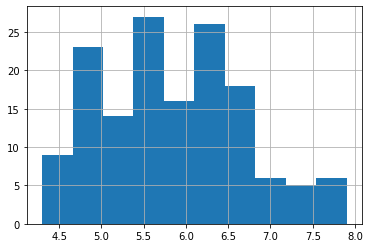

In [9]:
df['Sepal.Length'].hist()

<AxesSubplot:>

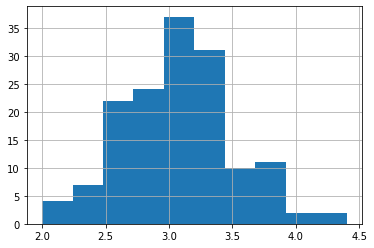

In [10]:
df['Sepal.Width'].hist()

<AxesSubplot:>

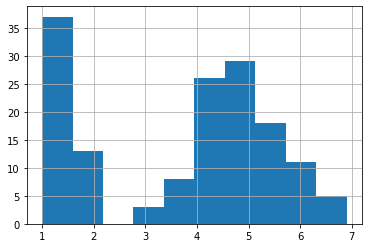

In [11]:
df['Petal.Length'].hist()

<AxesSubplot:>

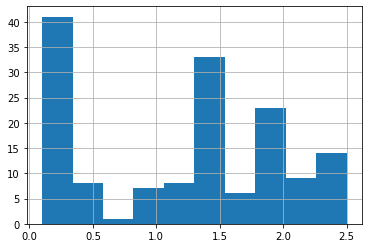

In [12]:
df['Petal.Width'].hist()

In [13]:
# create list of colors and class labels
colors = ['red', 'orange', 'blue']
species = ['virginica', 'versicolor', 'setosa']


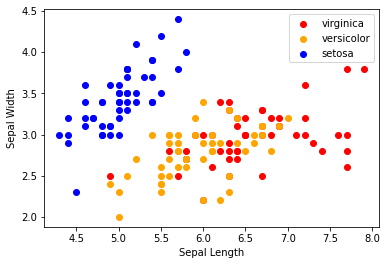

In [14]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['Sepal.Length'], x['Sepal.Width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

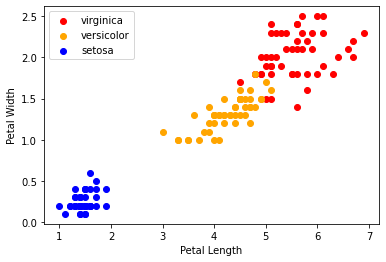

In [15]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['Petal.Length'], x['Petal.Width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

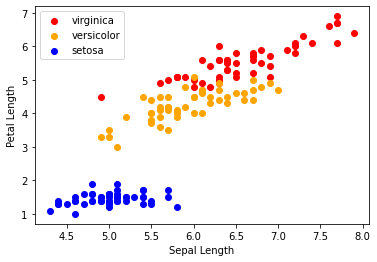

In [16]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['Sepal.Length'], x['Petal.Length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

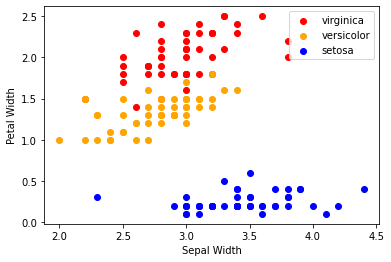

In [17]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['Sepal.Width'], x['Petal.Width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [18]:
# display the correlation matrix
df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

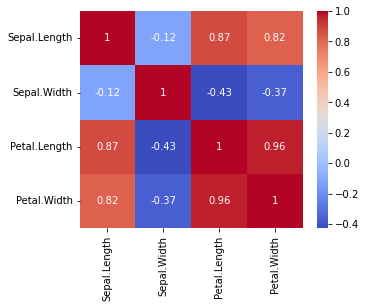

In [19]:
corr = df.corr()
# plot the heat map
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [20]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
# transform the string labels to integer
#df['Species'] = le.fit_transform(df['Species'])
#df.head()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

# input data
X = df.drop(columns=['Species'])
# output data
Y = df['Species']
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [22]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", model.score(x_test, y_test) * 100)

Logistic Regression Accuracy:  95.55555555555556


In [23]:
# model training
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [24]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [25]:

# K-nearest neighbors
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-nearest neighbors Accuracy: ", model.score(x_test, y_test) * 100)

K-nearest neighbors Accuracy:  95.55555555555556


In [26]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [27]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [28]:

# Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy: ", model.score(x_test, y_test) * 100)

Decision Tree Accuracy:  91.11111111111111


In [29]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [30]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  91.11111111111111


In [31]:
# save the model
#import pickle
#filename = 'saved_model.sav'
#pickle.dump(model, open(filename, 'wb'))

In [32]:
#import pickle

In [33]:

# Save the updated model
#filename = 'saved_model.sav'
#try:
  #  with open(filename, 'wb') as file:
   #     pickle.dump(model, file)
    #print("Model saved successfully.")
#except Exception as e:
 #   print(f"Error saving the model: {e}")

In [34]:
#load_model = pickle.load(open(filename, 'rb'))

In [35]:
#load_model.predict([[6.0, 2.2, 4.0, 1.0]])

In [36]:
import sklearn
print(sklearn.__version__)


1.3.0


In [44]:
x_test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
55,5.7,2.8,4.5,1.3
12,4.8,3.0,1.4,0.1
109,7.2,3.6,6.1,2.5
49,5.0,3.3,1.4,0.2
6,4.6,3.4,1.4,0.3


In [39]:
#import joblib

# Save the updated model using joblib
#filename_joblib = 'saved_model1.joblib'
#try:
    #joblib.dump(model, filename_joblib)
    #print("Model saved successfully using joblib.")
#except Exception as e:
    #print(f"Error saving the model using joblib: {e}")


Model saved successfully using joblib.


In [42]:
#import joblib

# Load the updated model using joblib
#filename_joblib = 'saved_model1.joblib'
#loaded_model = joblib.load(filename_joblib)

# Now you can use the "loaded_model" for inference or any other operations


In [46]:
import pickle

# Assuming 'model' is your scikit-learn model
with open('saved_model1.pkl', 'wb') as file:
    pickle.dump(model, file)


In [47]:
import pickle

# Load the model
with open('saved_model1.pkl', 'rb') as file:
    model = pickle.load(file)
